In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [5]:
cancer = load_breast_cancer()

In [8]:
cancer.data.shape

(569, 30)

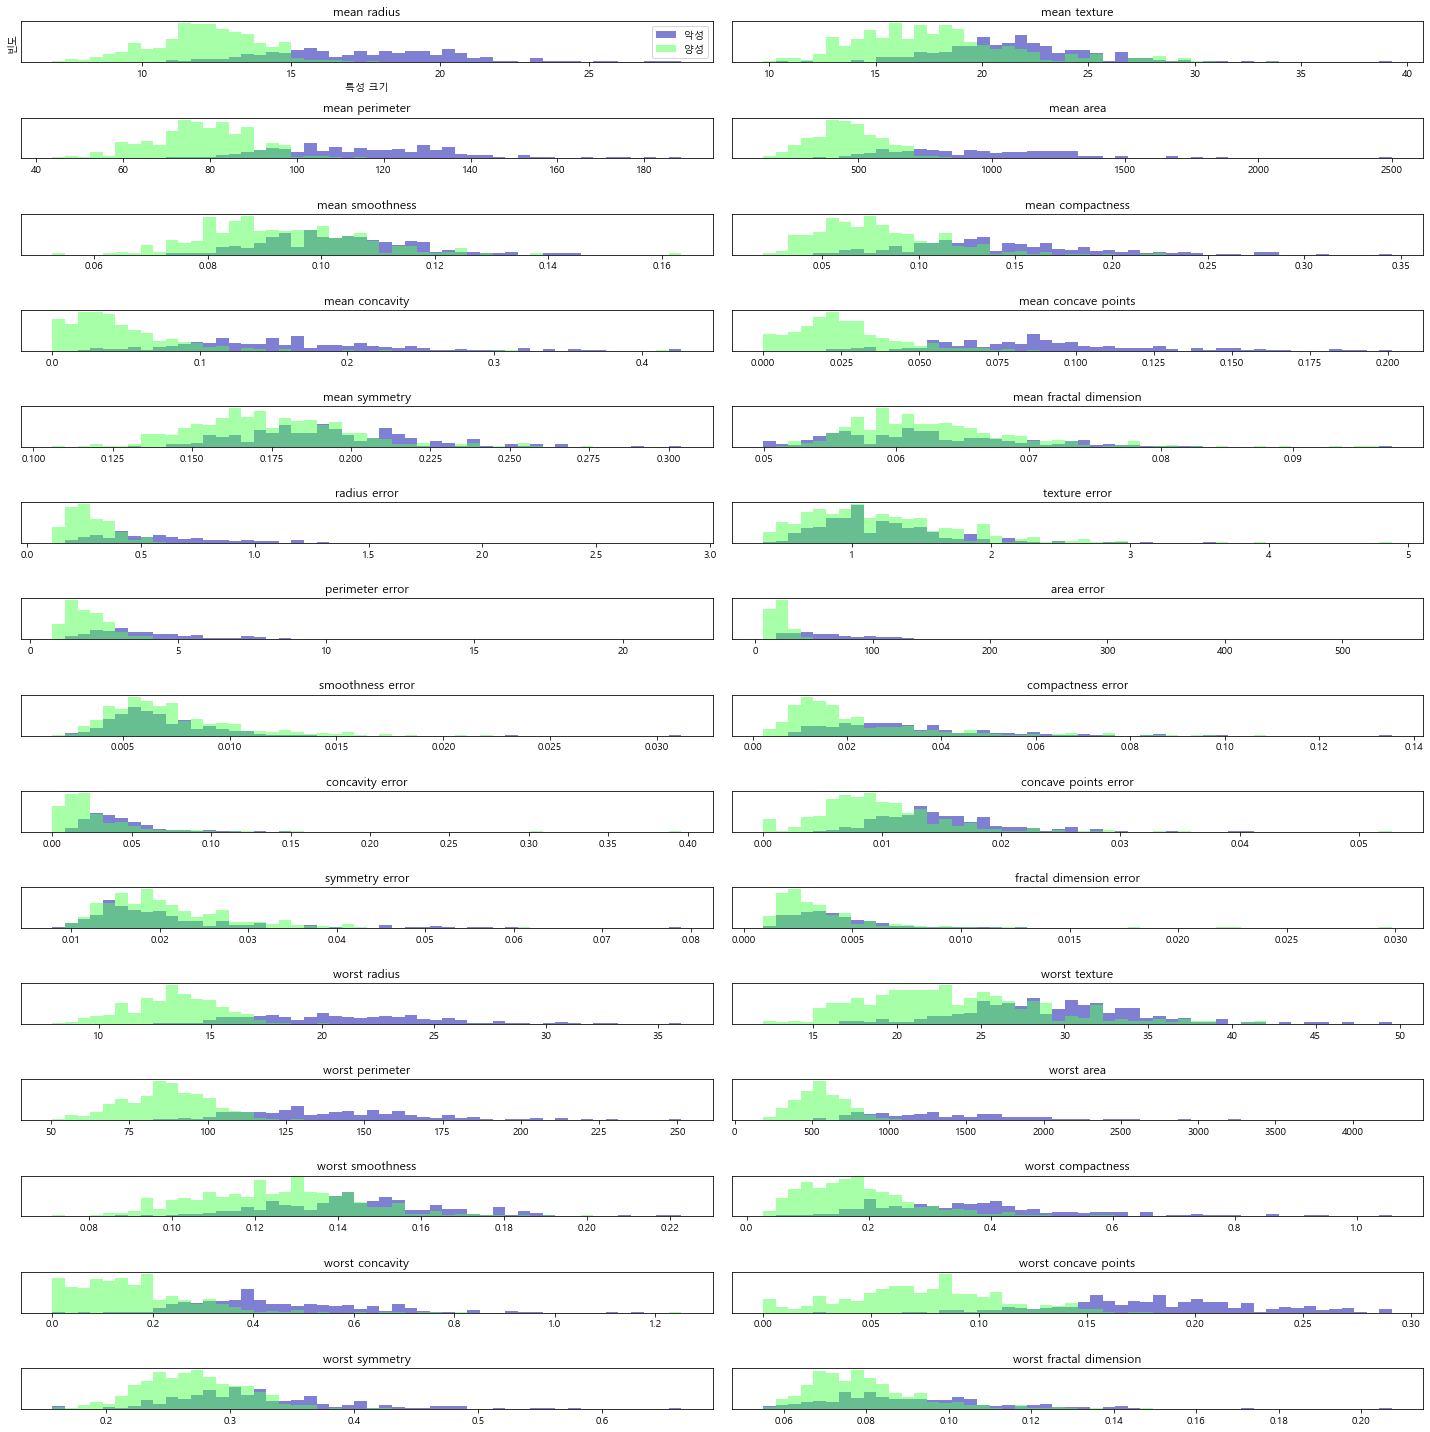

In [12]:
fig, axes = plt.subplots(15,2,figsize=(20,20))

mal = cancer.data[cancer.target==0] # 악성
ben = cancer.data[cancer.target==1] # 양성
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(mal[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(ben[:,i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성','양성'],loc='best')
fig.tight_layout()
plt.show()
# 그래프를 보고 해당 feature가 악성과 양성 data를 얼마나 잘 구분할지 파악 후 새로운 data를 분류해줄 feature 선정

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # 몇 개의 주성분을 남길건지
x_pca = pca.fit_transform(x_scaled)

In [18]:
x_pca.shape, x_scaled.shape

((569, 2), (569, 30))

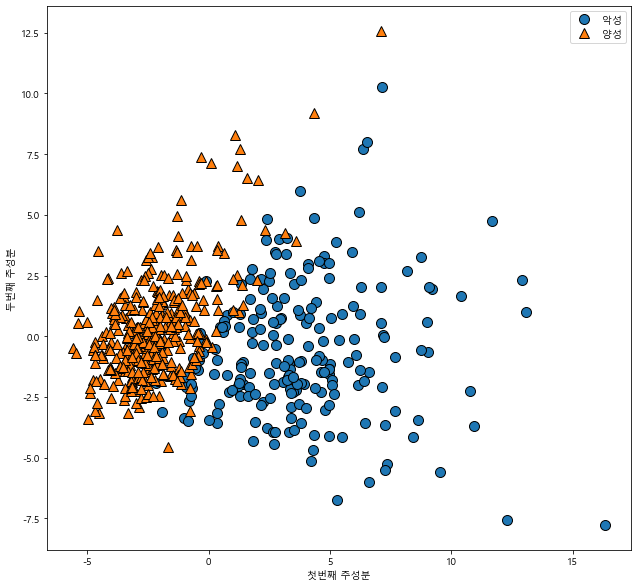

In [22]:
# 클래스의 색깔로 구분해서 두 개의 주성분 그래프 그려보기
plt.figure(figsize=(15,10))

mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], cancer.target)
plt.legend(['악성','양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()